Reloading historical stock data...
Loaded AAPL data. Rows: 10998
Loaded AMZN data. Rows: 6846
Loaded GOOG data. Rows: 5020
Loaded MSFT data. Rows: 9672
Loaded META data. Rows: 2926
Loaded NVDA data. Rows: 6421
Loaded TSLA data. Rows: 3545

Data Reload Complete.

AAPL Data with Moving Averages:
             Adj Close      SMA_20      SMA_50     SMA_200
Date                                                      
2024-07-24  218.287323  223.969257  208.233171  187.591488
2024-07-25  217.238556  224.181012  208.856650  187.794749
2024-07-26  217.708008  224.373788  209.466544  187.992895
2024-07-29  217.987686  224.754349  210.036284  188.195425
2024-07-30  218.547043  224.856731  210.614815  188.393737


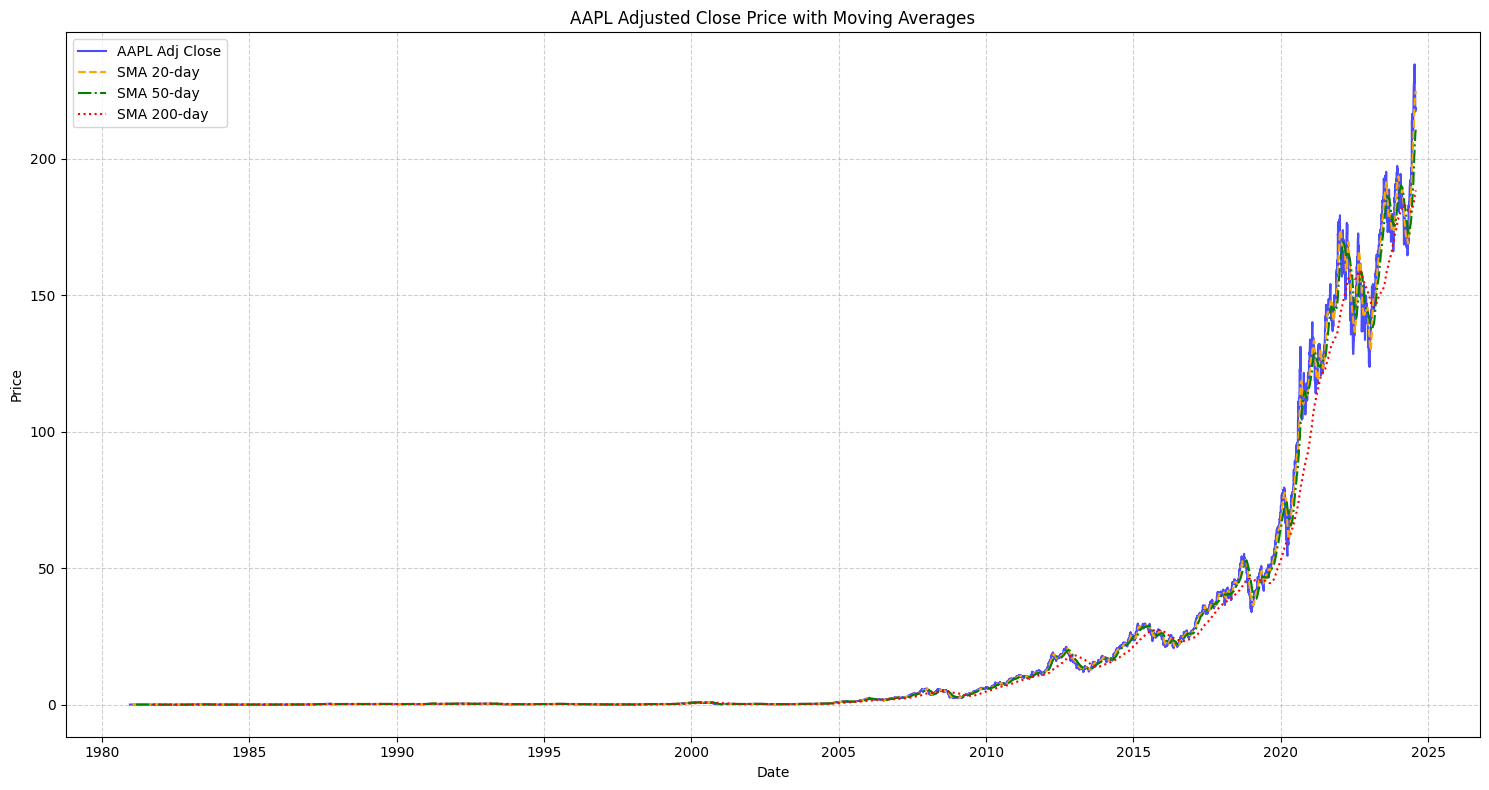

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_DIR = '../data/yfinance_data'
historical_dfs = {}

tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'META', 'NVDA', 'TSLA']

print("Reloading historical stock data...")
for ticker in tickers:
    file_path = os.path.join(DATA_DIR, f'{ticker}_historical_data.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
        df = df.dropna(subset=['Adj Close'])
        historical_dfs[ticker] = df
        print(f"Loaded {ticker} data. Rows: {len(df)}")
    else:
        print(f"Warning: {file_path} not found for {ticker}")

print("\nData Reload Complete.")

aapl_df = historical_dfs['AAPL'].copy()

aapl_df['SMA_20'] = aapl_df['Adj Close'].rolling(window=20).mean()

aapl_df['SMA_50'] = aapl_df['Adj Close'].rolling(window=50).mean()

aapl_df['SMA_200'] = aapl_df['Adj Close'].rolling(window=200).mean()

print("\nAAPL Data with Moving Averages:")
print(aapl_df[['Adj Close', 'SMA_20', 'SMA_50', 'SMA_200']].tail())

plt.figure(figsize=(15, 8))
plt.plot(aapl_df['Adj Close'], label='AAPL Adj Close', color='blue', alpha=0.7)
plt.plot(aapl_df['SMA_20'], label='SMA 20-day', color='orange', linestyle='--')
plt.plot(aapl_df['SMA_50'], label='SMA 50-day', color='green', linestyle='-.')
plt.plot(aapl_df['SMA_200'], label='SMA 200-day', color='red', linestyle=':')
plt.title('AAPL Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


AAPL Data with RSI:
             Adj Close      SMA_20      SMA_50     SMA_200        RSI
Date                                                                 
2024-07-24  218.287323  223.969257  208.233171  187.591488  48.694640
2024-07-25  217.238556  224.181012  208.856650  187.794749  47.392941
2024-07-26  217.708008  224.373788  209.466544  187.992895  48.062224
2024-07-29  217.987686  224.754349  210.036284  188.195425  48.482728
2024-07-30  218.547043  224.856731  210.614815  188.393737  49.365700

AAPL Data with MACD components:
             Adj Close      MACD  MACD_Signal  MACD_Hist
Date                                                    
2024-07-24  218.287323  4.661981     6.677905  -2.015924
2024-07-25  217.238556  3.748062     6.091936  -2.343875
2024-07-26  217.708008  3.026765     5.478902  -2.452137
2024-07-29  217.987686  2.449463     4.873014  -2.423551
2024-07-30  218.547043  2.013868     4.301185  -2.287317


/tmp/ipykernel_18574/2239389943.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/y/Nova_financial_solutions/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


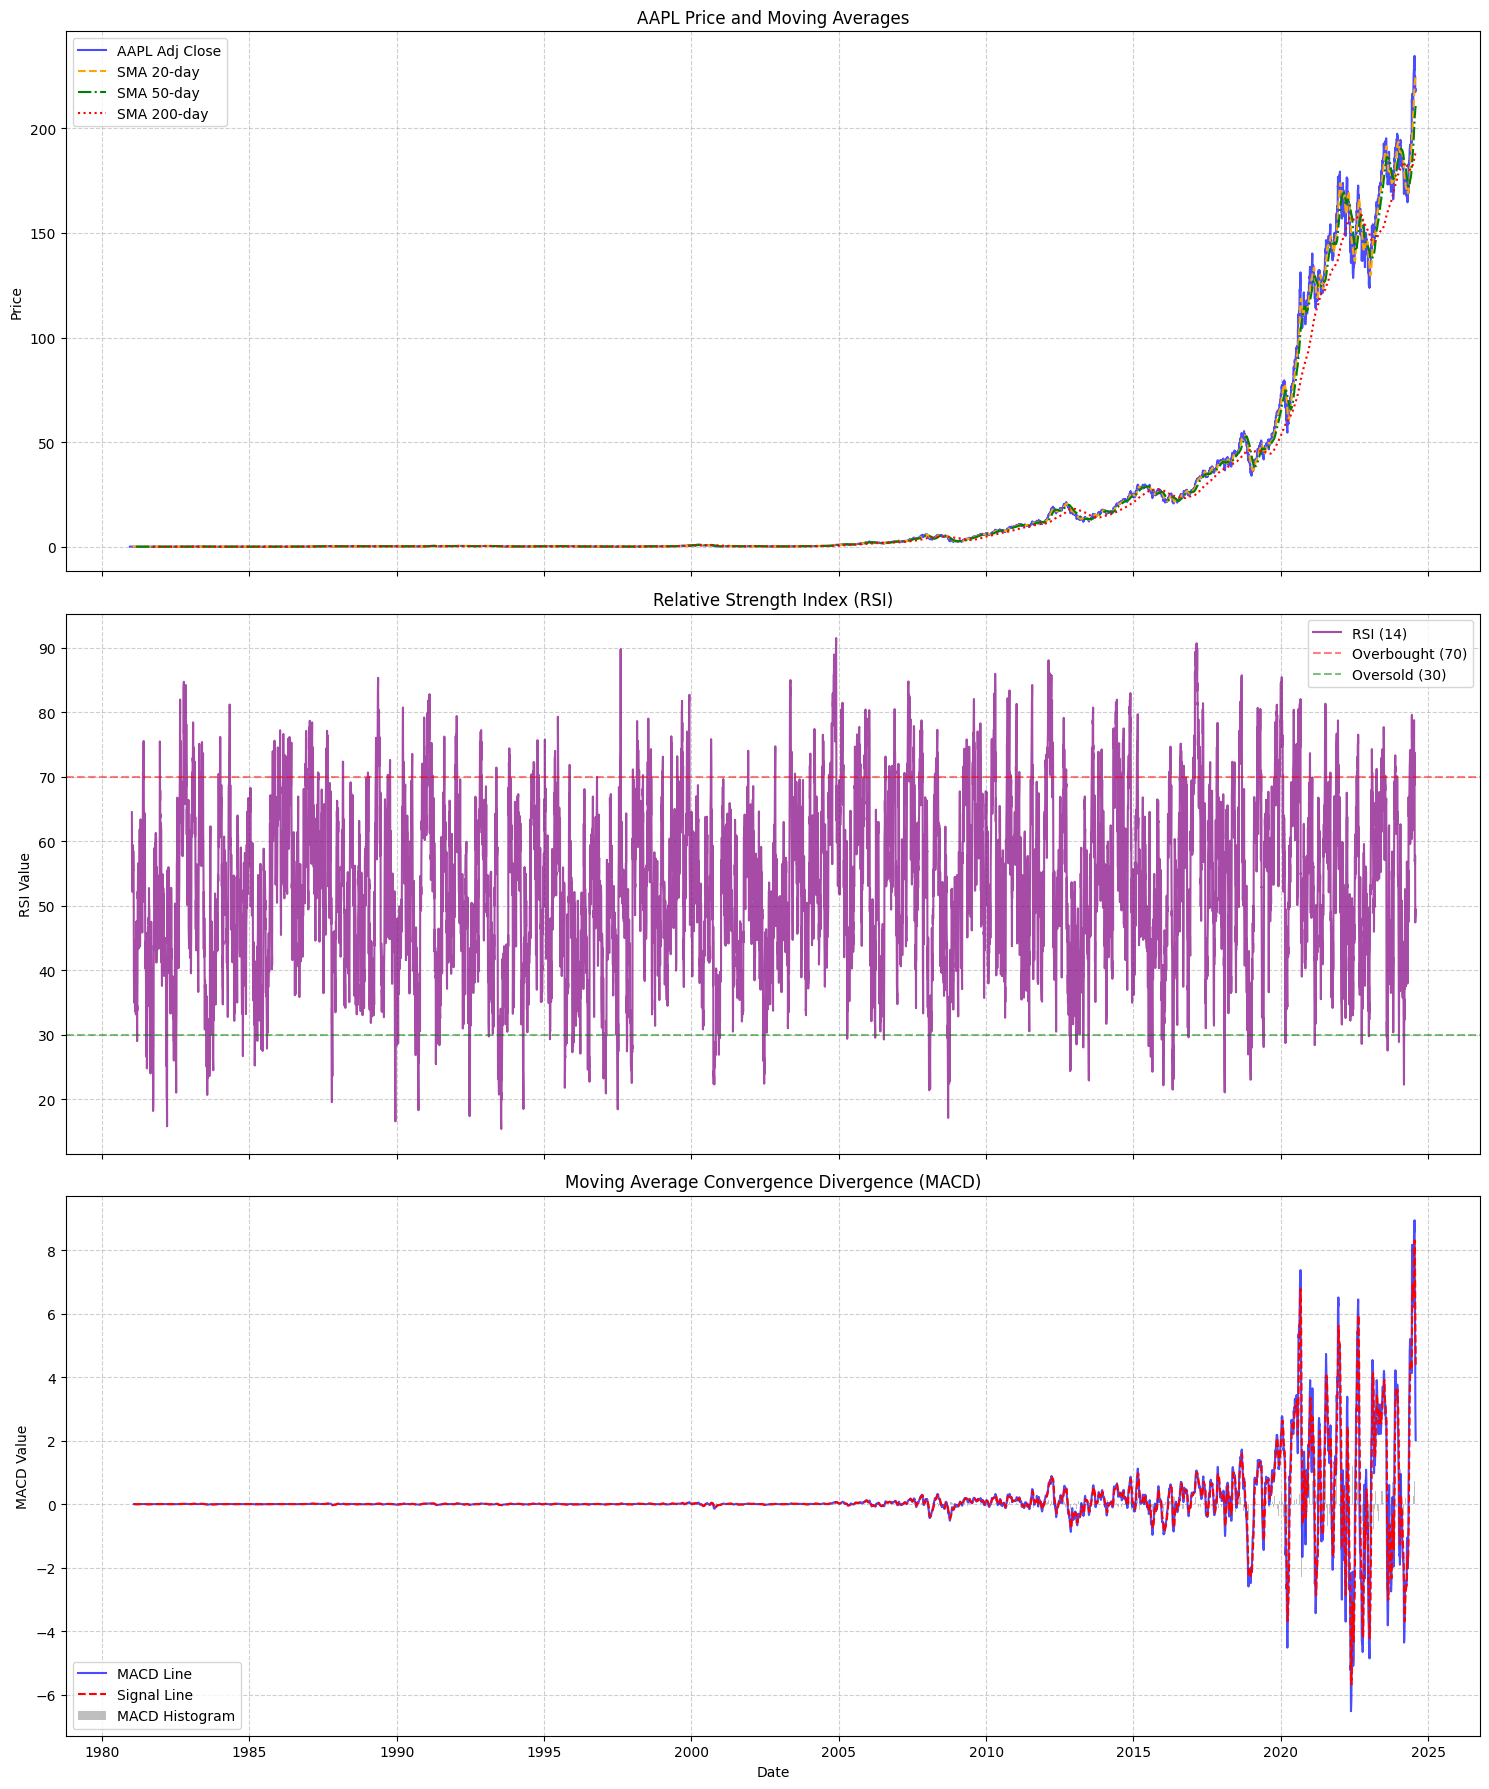

In [2]:
import talib

aapl_df['RSI'] = talib.RSI(aapl_df['Adj Close'].dropna(), timeperiod=14)

print("\nAAPL Data with RSI:")
print(aapl_df[['Adj Close', 'SMA_20', 'SMA_50', 'SMA_200', 'RSI']].tail())

aapl_df['MACD'], aapl_df['MACD_Signal'], aapl_df['MACD_Hist'] = talib.MACD(
    aapl_df['Adj Close'].dropna(),
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

print("\nAAPL Data with MACD components:")
print(aapl_df[['Adj Close', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail())

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18), sharex=True)

ax1.plot(aapl_df['Adj Close'], label='AAPL Adj Close', color='blue', alpha=0.7)
ax1.plot(aapl_df['SMA_20'], label='SMA 20-day', color='orange', linestyle='--')
ax1.plot(aapl_df['SMA_50'], label='SMA 50-day', color='green', linestyle='-.')
ax1.plot(aapl_df['SMA_200'], label='SMA 200-day', color='red', linestyle=':')
ax1.set_title('AAPL Price and Moving Averages')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.plot(aapl_df['RSI'], label='RSI (14)', color='purple', alpha=0.7)
ax2.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
ax2.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.plot(aapl_df['MACD'], label='MACD Line', color='blue', alpha=0.7)
ax3.plot(aapl_df['MACD_Signal'], label='Signal Line', color='red', linestyle='--')
ax3.bar(aapl_df.index, aapl_df['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
ax3.set_title('Moving Average Convergence Divergence (MACD)')
ax3.set_xlabel('Date')
ax3.set_ylabel('MACD Value')
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [3]:
aapl_df['Daily_Return'] = aapl_df['Adj Close'].pct_change()

print("\nAAPL Data with Daily Returns:")
print(aapl_df[['Adj Close', 'Daily_Return']].tail())

aapl_df['Volatility_20D'] = aapl_df['Daily_Return'].rolling(window=20).std()

print("\nAAPL Data with Volatility:")
print(aapl_df[['Daily_Return', 'Volatility_20D']].tail())

print("\nPyNance can now leverage these fundamental metrics for more advanced financial analysis.")
print("We've successfully calculated key financial metrics for Task 2.")


AAPL Data with Daily Returns:
             Adj Close  Daily_Return
Date                                
2024-07-24  218.287323     -0.028754
2024-07-25  217.238556     -0.004805
2024-07-26  217.708008      0.002161
2024-07-29  217.987686      0.001285
2024-07-30  218.547043      0.002566

AAPL Data with Volatility:
            Daily_Return  Volatility_20D
Date                                    
2024-07-24     -0.028754        0.017010
2024-07-25     -0.004805        0.016555
2024-07-26      0.002161        0.016543
2024-07-29      0.001285        0.016036
2024-07-30      0.002566        0.014710

PyNance can now leverage these fundamental metrics for more advanced financial analysis.
We've successfully calculated key financial metrics for Task 2.


In [4]:
import pandas as pd
from textblob import TextBlob
import os

NEWS_DATA_DIR = '../data'
NEWS_FILE_NAME = 'raw_analyst_ratings.csv'

STOCK_DATA_DIR = '../data/yfinance_data'
historical_dfs = {}

tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'META', 'NVDA', 'TSLA']

print("Ensuring historical stock data is loaded and prepared for correlation analysis...")
for ticker in tickers:
    file_path = os.path.join(STOCK_DATA_DIR, f'{ticker}_historical_data.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
        df = df.dropna(subset=['Adj Close'])
        historical_dfs[ticker] = df

        if 'Daily_Return' not in historical_dfs[ticker].columns:
            historical_dfs[ticker]['Daily_Return'] = historical_dfs[ticker]['Adj Close'].pct_change()
        print(f"Loaded and prepared {ticker} stock data.")
    else:
        print(f"Warning: {file_path} not found for {ticker} stock data. Please ensure it exists.")
print("Historical stock data checked/reloaded and daily returns calculated.")


print("\nLoading financial news dataset...")
news_file_path = os.path.join(NEWS_DATA_DIR, NEWS_FILE_NAME)

try:
    news_df = pd.read_csv(news_file_path)
    print(f"Successfully loaded {NEWS_FILE_NAME}. Rows: {len(news_df)}")
    print("\nNews DataFrame Info:")
    news_df.info()
    print("\nFirst 5 rows of News DataFrame:")
    print(news_df.head())

    print("\nNormalizing 'date' column in News DataFrame...")
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)
    news_df['news_date'] = news_df['date'].dt.date
    news_df = news_df.dropna(subset=['news_date'])
    print("Normalized 'news_date' column created. First 5 rows:")
    print(news_df[['date', 'news_date', 'headline']].head())

    print("\nDemonstrating Sentiment Analysis with TextBlob:")
    example_headline = news_df['headline'].iloc[0]
    print(f"Original headline: \"{example_headline}\"")
    blob = TextBlob(example_headline)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    print(f"Sentiment Polarity (ranges from -1 to 1, -ve for negative to +ve for positive): {sentiment_polarity:.2f}")
    print(f"Sentiment Subjectivity (ranges from 0 to 1, 0 for factual to 1 for opinionated): {sentiment_subjectivity:.2f}")

except FileNotFoundError:
    print(f"Error: News dataset '{news_file_path}' not found. Please ensure the file exists at the specified path ({NEWS_DATA_DIR}/{NEWS_FILE_NAME}).")
except Exception as e:
    print(f"An unexpected error occurred while loading or processing the news data: {e}")

Ensuring historical stock data is loaded and prepared for correlation analysis...
Loaded and prepared AAPL stock data.
Loaded and prepared AMZN stock data.
Loaded and prepared GOOG stock data.
Loaded and prepared MSFT stock data.
Loaded and prepared META stock data.
Loaded and prepared NVDA stock data.
Loaded and prepared TSLA stock data.
Historical stock data checked/reloaded and daily returns calculated.

Loading financial news dataset...
Successfully loaded raw_analyst_ratings.csv. Rows: 1407328

News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5

In [5]:
import pandas as pd
from textblob import TextBlob
import os

print("--- Starting Full Data Loading, Preprocessing, Sentiment Analysis, and Correlation Calculation ---")

NEWS_DATA_DIR = '../data'
NEWS_FILE_NAME = 'raw_analyst_ratings.csv'

STOCK_DATA_DIR = '../data/yfinance_data'

tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'META', 'NVDA', 'TSLA']

historical_dfs = {}

print("\nEnsuring historical stock data is loaded and prepared for correlation analysis...")
for ticker in tickers:
    file_path = os.path.join(STOCK_DATA_DIR, f'{ticker}_historical_data.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
        df = df.dropna(subset=['Adj Close'])
        historical_dfs[ticker] = df

        if 'Daily_Return' not in historical_dfs[ticker].columns:
            historical_dfs[ticker]['Daily_Return'] = historical_dfs[ticker]['Adj Close'].pct_change()
        print(f"Loaded and prepared {ticker} stock data.")
    else:
        print(f"Warning: {file_path} not found for {ticker} stock data. Please ensure it exists.")
print("Historical stock data checked/reloaded and daily returns calculated.")


print("\nLoading financial news dataset...")
news_file_path = os.path.join(NEWS_DATA_DIR, NEWS_FILE_NAME)

try:
    news_df = pd.read_csv(news_file_path)
    print(f"Successfully loaded {NEWS_FILE_NAME}. Rows: {len(news_df)}")
    print("\nNews DataFrame Info:")
    news_df.info()
    print("\nFirst 5 rows of News DataFrame:")
    print(news_df.head())

    print("\nNormalizing 'date' column in News DataFrame...")
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)
    news_df['news_date'] = news_df['date'].dt.date
    news_df = news_df.dropna(subset=['news_date'])
    print("Normalized 'news_date' column created. First 5 rows:")
    print(news_df[['date', 'news_date', 'headline']].head())

    print("\nDemonstrating Sentiment Analysis with TextBlob:")
    example_headline = news_df['headline'].iloc[0]
    print(f"Original headline: \"{example_headline}\"")
    blob = TextBlob(example_headline)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    print(f"Sentiment Polarity (ranges from -1 to 1, -ve for negative to +ve for positive): {sentiment_polarity:.2f}")
    print(f"Sentiment Subjectivity (ranges from 0 to 1, 0 for factual to 1 for opinionated): {sentiment_subjectivity:.2f}")

    print("\n--- Starting Full Sentiment Analysis and Correlation Calculation ---")

    print("\nApplying sentiment analysis to all news headlines...")
    def get_sentiment_polarity(text):
        try:
            return TextBlob(str(text)).sentiment.polarity
        except:
            return None

    news_df['sentiment_polarity'] = news_df['headline'].apply(get_sentiment_polarity)

    print("Sentiment analysis applied. First 5 rows with polarity:")
    print(news_df[['headline', 'sentiment_polarity']].head())

    print("\nAggregating daily sentiment by stock symbol and news date...")
    news_df_filtered = news_df[news_df['stock'].isin(tickers)].copy()
    news_df_filtered = news_df_filtered.dropna(subset=['sentiment_polarity'])
    news_df_filtered['stock'] = news_df_filtered['stock'].str.upper()

    daily_sentiment = news_df_filtered.groupby(['stock', 'news_date'])['sentiment_polarity'].mean().reset_index()
    daily_sentiment.rename(columns={'news_date': 'Date', 'stock': 'Ticker'}, inplace=True)
    daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
    daily_sentiment.set_index('Date', inplace=True)

    print("Aggregated daily sentiment sample (first 5 rows):")
    print(daily_sentiment.head())

    print("\nMerging aggregated sentiment with stock daily returns and calculating correlation...")
    correlation_results = {}

    for ticker, stock_df in historical_dfs.items():
        if ticker in daily_sentiment['Ticker'].unique():
            ticker_sentiment = daily_sentiment[daily_sentiment['Ticker'] == ticker].copy()

            merged_df = pd.merge(
                stock_df[['Daily_Return']],
                ticker_sentiment[['sentiment_polarity']],
                left_index=True,
                right_index=True,
                how='inner'
            )

            merged_df = merged_df.dropna(subset=['Daily_Return', 'sentiment_polarity'])

            print(f"DEBUG: {ticker} has {len(merged_df)} overlapping data points for correlation.")

            if not merged_df.empty and len(merged_df) > 1:
                correlation = merged_df['sentiment_polarity'].corr(merged_df['Daily_Return'])
                correlation_results[ticker] = correlation
            else:
                correlation_results[ticker] = None

    print("\n--- Correlation Results (Sentiment Polarity vs. Daily Return) ---")
    for ticker, corr_value in correlation_results.items():
        if corr_value is not None:
            print(f"Correlation for {ticker}: {corr_value:.4f}")
        else:
            print(f"Correlation for {ticker}: Not enough data for calculation.")

    print("\n--- Task 3: Initial Correlation Analysis Complete ---")

except FileNotFoundError:
    print(f"Error: News dataset '{news_file_path}' not found. Please ensure the file exists at the specified path ({NEWS_DATA_DIR}/{NEWS_FILE_NAME}).")
except Exception as e:
    print(f"An unexpected error occurred while loading or processing the news data: {e}")

--- Starting Full Data Loading, Preprocessing, Sentiment Analysis, and Correlation Calculation ---

Ensuring historical stock data is loaded and prepared for correlation analysis...
Loaded and prepared AAPL stock data.
Loaded and prepared AMZN stock data.
Loaded and prepared GOOG stock data.
Loaded and prepared MSFT stock data.
Loaded and prepared META stock data.
Loaded and prepared NVDA stock data.
Loaded and prepared TSLA stock data.
Historical stock data checked/reloaded and daily returns calculated.

Loading financial news dataset...
Successfully loaded raw_analyst_ratings.csv. Rows: 1407328

News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date 